In [3]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,GRU,Embedding,Dropout,LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,RMSprop,Nadam

In [4]:
import pandas as pd
print(pd.__version__)


2.2.2


In [5]:
df = pd.read_csv('merged_dataset.csv')


In [6]:
# first few rows
print(df.head())


                                                Text  Language
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas  på eng the jesuit...   Swedish
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch


In [7]:
import pandas as pd

# Calculate memory usage
memory_usage = df.memory_usage(deep=True).sum() / (1024**2)  # Convert to MB
print(f"Memory Usage: {memory_usage:.2f} MB")


Memory Usage: 17.81 MB


In [8]:
# Get basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32337 entries, 0 to 32336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      32337 non-null  object
 1   Language  32337 non-null  object
dtypes: object(2)
memory usage: 505.4+ KB
None


In [9]:
# Summary statistics
print(df.describe())

                                                     Text Language
count                                               32337    32337
unique                                              32126       30
top     haec commentatio automatice praeparata res ast...  English
freq                                                   48     2385


In [10]:
# Check for missing values
print(df.isnull().sum())

Text        0
Language    0
dtype: int64


In [11]:
# check shape
print(df.shape)

(32337, 2)


In [12]:
# Summary of categorical columns:
print(df['Language'].value_counts())


Language
English       2385
French        2014
Spanish       1819
Russian       1692
Dutch         1546
Arabic        1536
Turkish       1474
Tamil         1469
Hindi         1063
Romanian      1000
Persian       1000
Pushto        1000
Swedish       1000
Estonian      1000
Korean        1000
Chinese       1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Japanese      1000
Thai          1000
Portugeese     739
Italian        698
Sweedish       676
Malayalam      594
German         470
Danish         428
Kannada        369
Greek          365
Name: count, dtype: int64


In [13]:
# View a few random samples for specific languages:
language_sample = df[df['Language'] == 'English'].sample(5)
print(language_sample['Text'])


1359     the shree camp hanuman temple hindi कामप हनुमा...
11226    orner along with actress cate blanchett was on...
22345    [77] In the Seigenthaler biography incident, a...
22992    [81] Although machine learning has been transf...
22448    [144] Various Wikipedians have criticized Wiki...
Name: Text, dtype: object


# Text Cleaning Steps

In [14]:
import re

def clean_text(text):
    # Remove text in brackets
    text = re.sub(r'\[.*?\]', '', text)
    return text.strip()

# Apply to the entire dataset
df['Cleaned_Text'] = df['Text'].apply(clean_text)


In [15]:
# Lowercasing: Normalize text by converting it to lowercase
df['Cleaned_Text'] = df['Cleaned_Text'].str.lower()


In [16]:
# Verify Cleaning: Check a few rows to ensure the cleaning worked as expected:
print(df[['Text', 'Cleaned_Text']].head())


                                                Text  \
0  klement gottwaldi surnukeha palsameeriti ning ...   
1  sebes joseph pereira thomas  på eng the jesuit...   
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...   
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...   
4  de spons behoort tot het geslacht haliclona en...   

                                        Cleaned_Text  
0  klement gottwaldi surnukeha palsameeriti ning ...  
1  sebes joseph pereira thomas  på eng the jesuit...  
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...  
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...  
4  de spons behoort tot het geslacht haliclona en...  


In [17]:
# Inspect cleaned rows again
print(df[['Text', 'Cleaned_Text']].sample(10))


                                                    Text  \
5180   स्पर्शोंद्रिय - इसके अंतर्गत त्वचा आती है। त्व...   
6425   kristen bells första framträdande i en film va...   
20575  apesar de ser mantido por colaboradores não é ...   
18151  haec commentatio automatice praeparata res ast...   
14938  كما قررت اللجنة التنفيذية الجديدة تعيين السيد ...   
22927  Inductive programming is a related field that ...   
22109  A pond is a body of standing water, either nat...   
9435   acara tersebut pertama kali diadakan di mumbai...   
1809   en mathématiques un difféomorphisme est un iso...   
28632  У меня вся эта грязь на моих прекрасных пальчи...   

                                            Cleaned_Text  
5180   स्पर्शोंद्रिय - इसके अंतर्गत त्वचा आती है। त्व...  
6425   kristen bells första framträdande i en film va...  
20575  apesar de ser mantido por colaboradores não é ...  
18151  haec commentatio automatice praeparata res ast...  
14938  كما قررت اللجنة التنفيذية الجديدة تعي

In [18]:
# Check Cleaned Text Quality
print(df['Cleaned_Text'].isnull().sum())  # Check for null values
print(df[df['Cleaned_Text'] == 'NO_CONTENT'])  # Inspect placeholder rows


0
Empty DataFrame
Columns: [Text, Language, Cleaned_Text]
Index: []


In [19]:
# Inspect a random sample:
print(df[['Text', 'Cleaned_Text']].sample(10))


                                                    Text  \
32268                               ಅದನ್ನು ಉಲ್ಲೇಖಿಸಬೇಡಿ.   
18121  愛知県生まれ。年和歌山大学経済学部卒、年神戸大学大学院経営学研究科博士課程満期退学、年「ドイ...   
30710  jag lyssnade inte eftersom du kanske var uppta...   
25795            Wikipédia a reçu deux prix en mai 2004.   
7603   شهيد شيخ صاحب ته الله تعالی ستر علمي شان اومقا...   
3911   年月日に、ザクセン王フリードリヒ・アウグスト世から、「王の飲み物」として認定を受け、ザクセン...   
29380  L'analisi computazionale degli algoritmi di ap...   
18481  سیره نبوی شامل زندگی‌نامه‌های سنتی نوشته‌شده ت...   
9091   एस्टोनिया ने सोची में  शीतकालीन ओलंपिक रूस में...   
26041  ce qui signifie qui incite la personne à répét...   

                                            Cleaned_Text  
32268                               ಅದನ್ನು ಉಲ್ಲೇಖಿಸಬೇಡಿ.  
18121  愛知県生まれ。年和歌山大学経済学部卒、年神戸大学大学院経営学研究科博士課程満期退学、年「ドイ...  
30710  jag lyssnade inte eftersom du kanske var uppta...  
25795            wikipédia a reçu deux prix en mai 2004.  
7603   شهيد شيخ صاحب ته الله تعالی ستر علمي 

In [20]:
# Check the cleaned data
print(df[['Text', 'Language', 'Cleaned_Text']].sample(10))

                                                    Text    Language  \
3271   斯大林在中国第一次大革命的时候，提出关于中国革命的一系列问题，并对之作了论断，驳斥托洛茨基派...     Chinese   
11146  pada masa kekhalifahan islam paspor digunakan ...  Indonesian   
27287  la economía ha sido muy lenta este año o el pa...     Spanish   
30156                        Sana geri dönmeme izin ver.     Turkish   
4304   سپارښتنې ــ زماددولت څخه داغوښتنه ده چې دهېواد...      Pushto   
10363  большая часть - и -звёздочных отелей в мире им...     Russian   
18477  paskah merupakan perayaan tertua di dalam gere...  Indonesian   
12347  он водрузил знамя победы над рейхстагом  псков...     Russian   
1623   اٹلانٹک کاؤنٹی نیو جرسی  انگریزی atlantic coun...        Urdu   
1789   i̇stanbul teknik üniversitesi’nin birçok mühen...     Turkish   

                                            Cleaned_Text  
3271   斯大林在中国第一次大革命的时候，提出关于中国革命的一系列问题，并对之作了论断，驳斥托洛茨基派...  
11146  pada masa kekhalifahan islam paspor digunakan ...  
27287  la economía ha sido muy

Language
English       2385
French        2014
Spanish       1819
Russian       1692
Dutch         1546
Arabic        1536
Turkish       1474
Tamil         1469
Hindi         1063
Romanian      1000
Persian       1000
Pushto        1000
Swedish       1000
Estonian      1000
Korean        1000
Chinese       1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Japanese      1000
Thai          1000
Portugeese     739
Italian        698
Sweedish       676
Malayalam      594
German         470
Danish         428
Kannada        369
Greek          365
Name: count, dtype: int64


<Axes: title={'center': 'Language Distribution'}, xlabel='Language'>

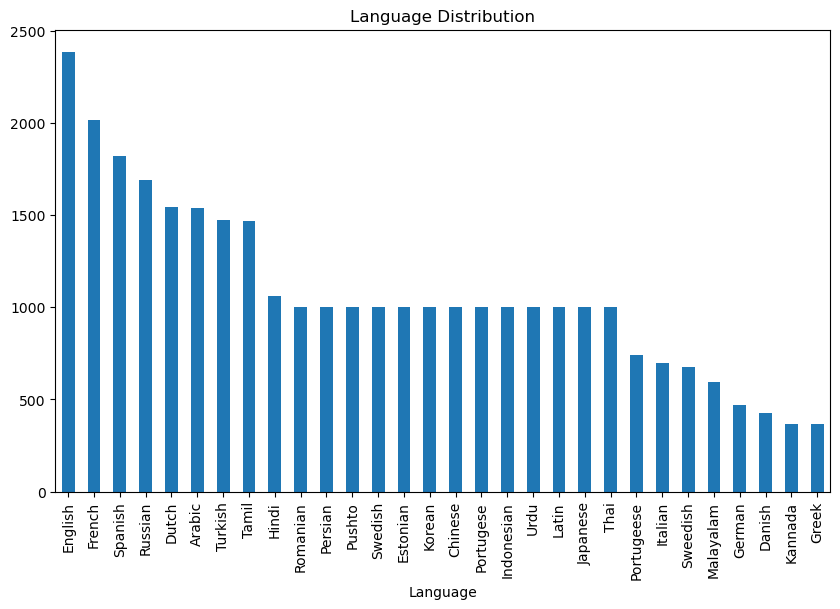

In [21]:
# Examine the Data:
language_count = df['Language'].value_counts()
print(language_count)
language_count.plot(kind='bar', figsize=(10, 6), title='Language Distribution')


In [22]:
import pandas as pd

# Calculate memory usage
memory_usage = df.memory_usage(deep=True).sum() / (1024**2)  # Convert to MB
print(f"Memory Usage: {memory_usage:.2f} MB")


Memory Usage: 33.86 MB


In [23]:
# Check for any missing values
print(df.isnull().sum())


Text            0
Language        0
Cleaned_Text    0
dtype: int64


In [24]:
print(df['Cleaned_Text'].sample(5))  # Random sample


23366    was very scared don't worry my dear all of thi...
27643                  βιβλιογραφία) είναι αμφισβητούμενο.
11295    president jimmy carters commutation of her fed...
16890    in  vormde vallourec een joint venture met de ...
1799     alparslan türkeş sırrı süreyya önder atila kay...
Name: Cleaned_Text, dtype: object


 # Split the Data

In [25]:
print(df.columns)


Index(['Text', 'Language', 'Cleaned_Text'], dtype='object')


In [26]:
X = df['Cleaned_Text']
y = df['Language']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

# label encoding

In [27]:
le =LabelEncoder()
y_train= le.fit_transform(y_train)
le.classes_

array(['Arabic', 'Chinese', 'Danish', 'Dutch', 'English', 'Estonian',
       'French', 'German', 'Greek', 'Hindi', 'Indonesian', 'Italian',
       'Japanese', 'Kannada', 'Korean', 'Latin', 'Malayalam', 'Persian',
       'Portugeese', 'Portugese', 'Pushto', 'Romanian', 'Russian',
       'Spanish', 'Swedish', 'Sweedish', 'Tamil', 'Thai', 'Turkish',
       'Urdu'], dtype=object)

In [28]:
y_test = le.transform(y_test)

# tokenization

In [29]:
tokenizer = Tokenizer(num_words=100000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [30]:
X_train_padded = pad_sequences(X_train_seq,maxlen=100,padding='post')
X_test_padded = pad_sequences(X_test_seq,maxlen=100,padding='post')

In [31]:
input_dim = tokenizer.num_words
embedding_dim = 128
max_lenght = X_train_padded.shape[1]
num_classes = len(le.classes_)
max_lenght

100

# gru model

In [30]:
# GRU Model Architecture
model = Sequential([
    Embedding(input_dim=input_dim,output_dim=embedding_dim),
    GRU(128, return_sequences=False),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor (can also use 'val_accuracy')
    patience=3,          # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore weights from the best epoch
)

# Compile the GRU model
model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_padded,y_train,epochs=20,batch_size=32,validation_split=0.1)
model.summary()

Epoch 1/20
728/728 ━━━━━━━━━━━━━━━━━━━━ 110s 145ms/step - accuracy: 0.1092 - loss: 3.1532 - val_accuracy: 0.7074 - val_loss: 1.0161
Epoch 2/20
728/728 ━━━━━━━━━━━━━━━━━━━━ 99s 135ms/step - accuracy: 0.8011 - loss: 0.6956 - val_accuracy: 0.9045 - val_loss: 0.3330
Epoch 3/20
728/728 ━━━━━━━━━━━━━━━━━━━━ 100s 138ms/step - accuracy: 0.9265 - loss: 0.2404 - val_accuracy: 0.9208 - val_loss: 0.2567
Epoch 4/20
728/728 ━━━━━━━━━━━━━━━━━━━━ 106s 146ms/step - accuracy: 0.9503 - loss: 0.1465 - val_accuracy: 0.9235 - val_loss: 0.2626
Epoch 5/20
728/728 ━━━━━━━━━━━━━━━━━━━━ 104s 143ms/step - accuracy: 0.9595 - loss: 0.1142 - val_accuracy: 0.9258 - val_loss: 0.2460
Epoch 6/20
728/728 ━━━━━━━━━━━━━━━━━━━━ 98s 135ms/step - accuracy: 0.9641 - loss: 0.0967 - val_accuracy: 0.9293 - val_loss: 0.2483
Epoch 7/20
728/728 ━━━━━━━━━━━━━━━━━━━━ 103s 142ms/step - accuracy: 0.9667 - loss: 0.0832 - val_accuracy: 0.9219 - val_loss: 0.2786
Epoch 8/20
728/728 ━━━━━━━━━━━━━━━━━━━━ 109s 150ms/step - accuracy: 0.9679 - l

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 128)       │    12,800,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 30)             │         3,870 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,708,828 (147.66 MB)

 Trainable params: 12,902,942 (49.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,805,886 (98.44 MB)

In [32]:
# test 
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

NameError: name 'model' is not defined

In [32]:
# Save the GRU model and accuracy
model.save('gru.h5')
print(f"GRU Model saved successfully.")
print(f"Final GRU Accuracy: {history.history['accuracy'][-1]:.4f}")


GRU Model saved successfully.
Final GRU Accuracy: 0.9679


In [33]:
import joblib

joblib.dump(tokenizer, 'tokenizer2.joblib')

joblib.dump(le, 'label_encoder2.joblib')


['label_encoder2.joblib']

In [34]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [35]:
print(le.classes_)

['Arabic' 'Chinese' 'Danish' 'Dutch' 'English' 'Estonian' 'French'
 'German' 'Greek' 'Hindi' 'Indonesian' 'Italian' 'Japanese' 'Kannada'
 'Korean' 'Latin' 'Malayalam' 'Persian' 'Portugeese' 'Portugese' 'Pushto'
 'Romanian' 'Russian' 'Spanish' 'Swedish' 'Sweedish' 'Tamil' 'Thai'
 'Turkish' 'Urdu']


In [33]:
import pandas as pd
import numpy as np
import re
import joblib
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model

In [34]:
# Load the LabelEncoder, tokenizer, and model
encoder = joblib.load('label_encoder2.joblib')
tokenizer = joblib.load('tokenizer2.joblib')
model = load_model('gru.h5')

In [35]:
def preprocess_sentence(sentence, tokenizer, max_length):
    cleaned_sentence = clean_text(sentence)
    sequence = tokenizer.texts_to_sequences([cleaned_sentence])
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')
    return padded_sequence

In [36]:
sentence = "最大249の言語を翻訳します。機能サポートは言語によって異なります。テキスト：入力を通じて言語間翻訳が可能です。オフライン：インターネットなしで翻訳してください..."

In [37]:
input_data = preprocess_sentence(sentence,tokenizer, max_length=100)

In [38]:
prediction = model.predict(input_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


In [39]:
predicted_class_index = np.argmax(prediction)  # Get the index of the highest probability
predicted_class_label = encoder.inverse_transform([predicted_class_index])[0]  # Map index to original label

In [40]:
print(f"Input Sentence: {sentence}")
print(f"Predicted Class Index: {predicted_class_index}")
print(f"Predicted Class Label: {predicted_class_label}")

Input Sentence: 最大249の言語を翻訳します。機能サポートは言語によって異なります。テキスト：入力を通じて言語間翻訳が可能です。オフライン：インターネットなしで翻訳してください...
Predicted Class Index: 1
Predicted Class Label: Chinese


In [41]:

# Sample sentences for each language
test_sentences = {
    "Arabic": "كيف حالك؟",
    "Chinese": "你好吗？",
    "Danish": "Hvordan har du det?",
    "Dutch": "Hoe gaat het met je?",
    "English": "How are you?",
    "Estonian": "Kuidas sul läheb?",
    "French": "Bonjour, comment ça va?",
    "German": "Wie geht es dir?",
    "Greek": "Πώς είσαι?",
    "Hindi": "तुम कैसे हो?",
    "Indonesian": "Apa kabar?",
    "Italian": "Come stai?",
    "Japanese": "こんにちは、お元気ですか？",
    "Kannada": "ನೀವು ಹೇಗಿದ್ದೀರಾ?",
    "Korean": "어떻게 지내세요?",
    "Latin": "Quomodo vales?",
    "Malayalam": "നിങ്ങൾക്ക് സുഖമാണോ?",
    "Persian": "چطوری؟",
    "Portuguese": "Como você está?",
    "Pushto": "ته څنګه يې؟",
    "Romanian": "Cum ești?",
    "Russian": "Как дела?",
    "Spanish": "Hola, ¿cómo estás?",
    "Swedish": "Hur mår du?",
    "Tamil": "நீங்கள் எப்படி இருக்கிறீர்கள்?",
    "Thai": "คุณเป็นอย่างไรบ้าง?",
    "Turkish": "Nasılsın?",
    "Urdu": "آپ کیسے ہیں؟"
}



input_data = preprocess_sentence(sentence,tokenizer, max_length=100)

# Iterate through each test sentence
for language, sentence in test_sentences.items():
    # Tokenize and preprocess the input
    input_data = preprocess_sentence(sentence,tokenizer, max_length=100)

    prediction = model.predict(input_data)

    
    # Predict the class index
    predicted_class_index = np.argmax(prediction)  # Get the index of the highest probability
    predicted_class_label = encoder.inverse_transform([predicted_class_index])[0]  # Map index to original label
    
    # Print results
    print(f"Input Sentence ({language}): {sentence}")
    print(f"Predicted Language: {predicted_class_label}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Input Sentence (Arabic): كيف حالك؟
Predicted Language: Arabic

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Input Sentence (Chinese): 你好吗？
Predicted Language: Chinese

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Input Sentence (Danish): Hvordan har du det?
Predicted Language: Danish

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Input Sentence (Dutch): Hoe gaat het met je?
Predicted Language: Dutch

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Input Sentence (English): How are you?
Predicted Language: English

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Input Sentence (Estonian): Kuidas sul läheb?
Predicted Language: Malayalam

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Input Sentence (French): Bonjour, comment ça va?
Predicted Language: French

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Input Sentence (German): Wie geht es dir?
Predicted Language: German

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Input Sentence (Greek): Πώς είσαι?
Predicted Language: Greek

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/ste

In [42]:
print("Encoder Classes:", encoder.classes_)


Encoder Classes: ['Arabic' 'Chinese' 'Danish' 'Dutch' 'English' 'Estonian' 'French'
 'German' 'Greek' 'Hindi' 'Indonesian' 'Italian' 'Japanese' 'Kannada'
 'Korean' 'Latin' 'Malayalam' 'Persian' 'Portugeese' 'Portugese' 'Pushto'
 'Romanian' 'Russian' 'Spanish' 'Swedish' 'Sweedish' 'Tamil' 'Thai'
 'Turkish' 'Urdu']
